In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DATA_BASE_DIR = '/home/drx/PycharmProjects/MA/data/anomalies'
data_sets = ['amplitude-larger', 'amplitude-smaller', 'global-extremum', 'local-extremum', 'pattern-anomaly']
hidden_dims = [50, 100]
encoding_dims = [40, 80]
window_sizes = [10, 25, 50, 100]
file_names = ['aleatoric_uncertainty', 'epistemic_uncertainty']

In [12]:
file_name_mapping = {
    'aleatoric_uncertainty': 'Aleatoric Uncertainty',
    'epistemic_uncertainty': 'Epistemic Uncertainty'
}

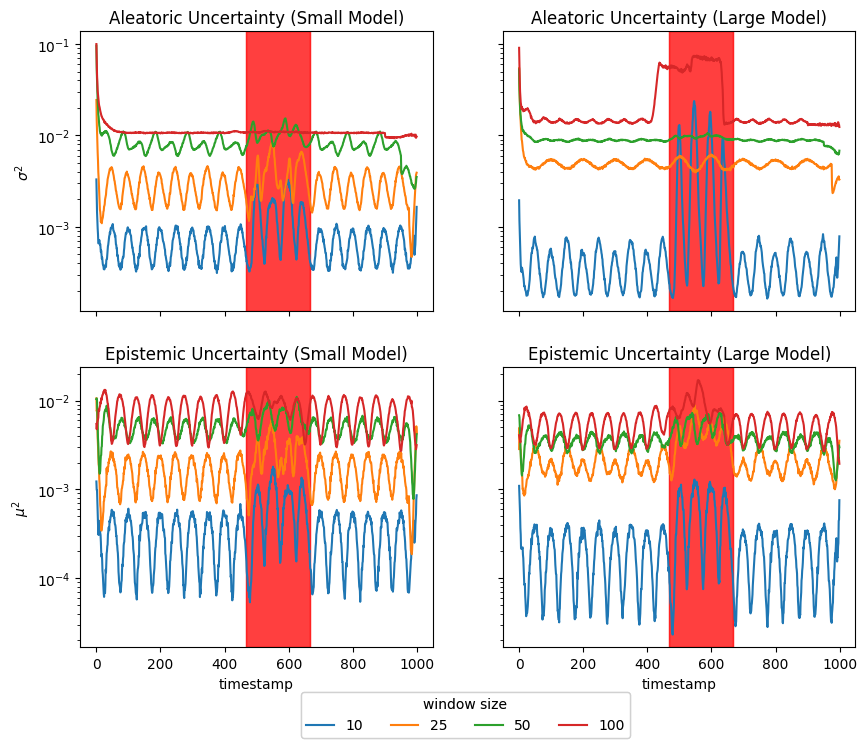

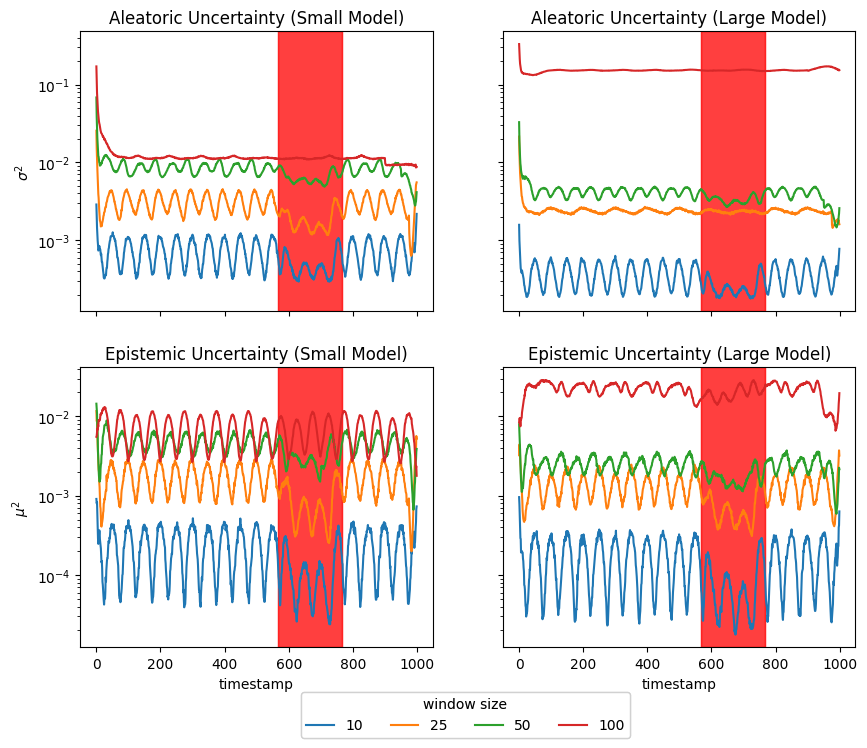

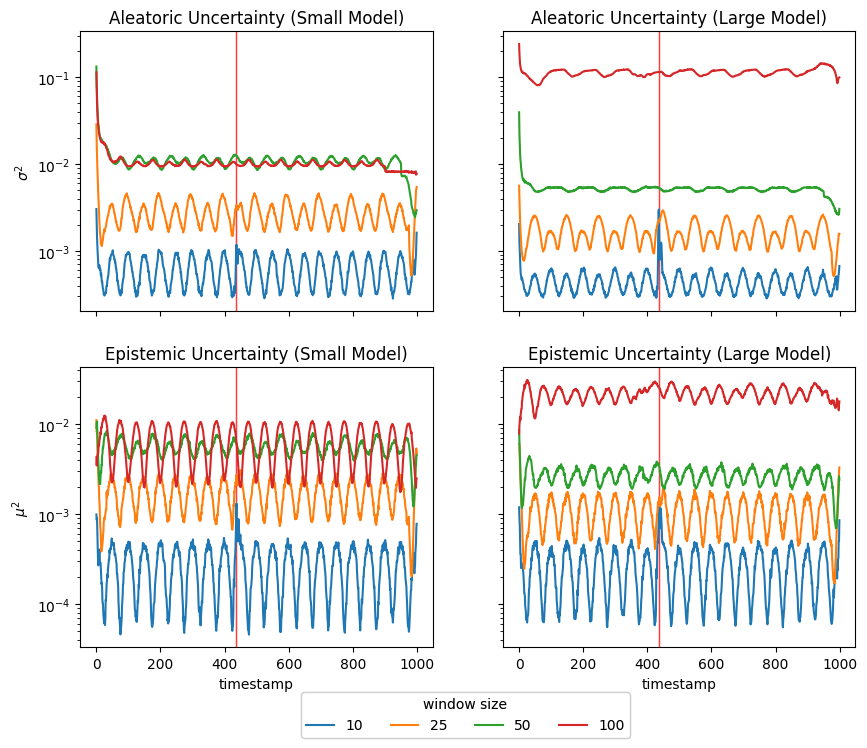

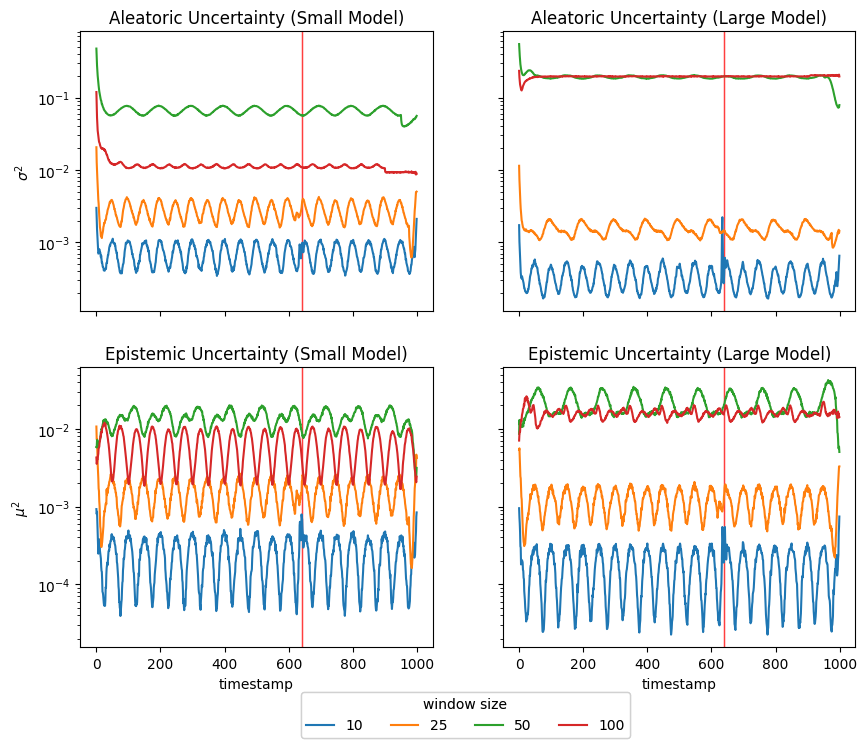

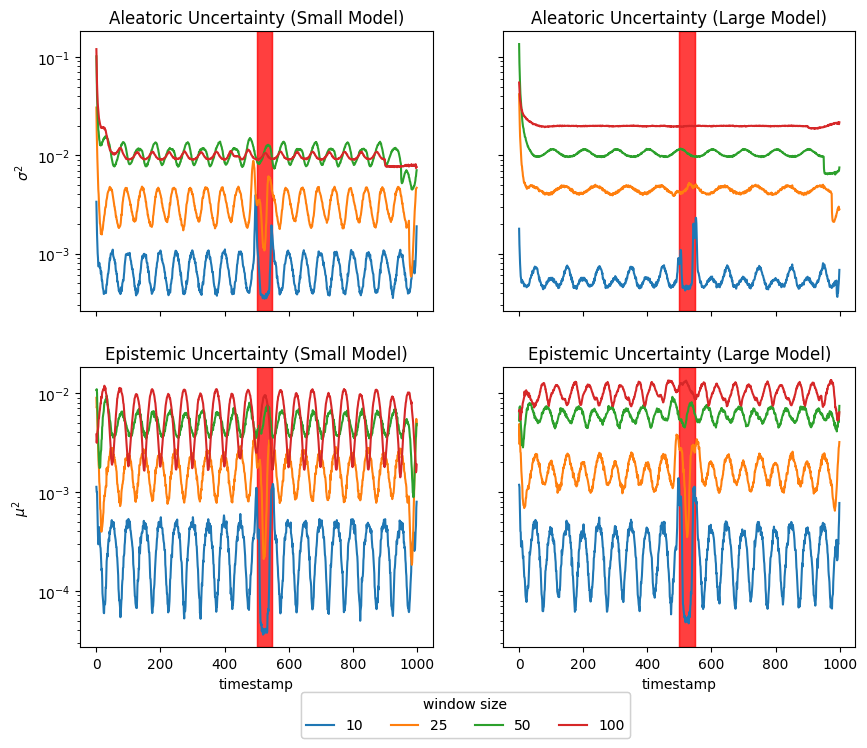

In [22]:
for data_set in data_sets:
    fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
    path = f'{DATA_BASE_DIR}/{data_set}'
    df = pd.read_csv(f'{path}/test.csv', usecols=['timestamp', 'is_anomaly'])
    first_one_index = np.argmax(df['is_anomaly'].values)
    last_one_index = len(df) - np.argmax(df['is_anomaly'][::-1].values) - 1

    for j, (hidden_dim, encoding_dim) in enumerate(zip(hidden_dims, encoding_dims)):
        for window_size in window_sizes:
            for i, file_name in enumerate(file_names):
                path = f'{data_set}/{hidden_dim}-{encoding_dim}/window_size_{window_size}/test/data/{file_name}.pt'
                df = torch.load(path, map_location=torch.device('cpu'))
                
                axs[i, j].plot(df, label=window_size)
                if hidden_dim == 50:
                    axs[i, j].set_title(f'{file_name_mapping[file_name]} (Small Model)')
                else:
                    axs[i, j].set_title(f'{file_name_mapping[file_name]} (Large Model)')
                axs[i, j].set_yscale('log')
                if file_name == 'aleatoric_uncertainty':
                    axs[i, 0].set_ylabel(r'$\sigma^2$')
                elif file_name == 'epistemic_uncertainty':
                    axs[i, 0].set_ylabel(r'$\mu^2$')
    
    
        for l in range(len(hidden_dims)):
            for k in range(len(file_names)):
                axs[k,l].axvspan(first_one_index, last_one_index, color='red', alpha=0.5)
        
        for l in range(len(hidden_dims)):
            axs[-1, l].set_xlabel('timestamp')
        
        labels = ["10", "25", "50", "100"]
        fig.legend(labels, title="window size", loc='lower center', ncol=4, bbox_to_anchor=(0.51, -0.012))
        fig.savefig(f'figures/{data_set}.pdf')